# Song Recommendation

## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

## Reading data from Mysql Database

In [2]:
import mysql.connector as sql
import pandas as pd
db_connection=sql.connect(host='localhost',database='project24',user='root',password='root')

mydatabase=db_connection.cursor()
sql_statement1="select * from song"
mydatabase.execute(sql_statement1)

song_data=pd.DataFrame(mydatabase.fetchall())

song_data.columns=['Song_Id','Title','Release','Artist_Name','Year']
song_data.head()

,Song_Id,Title,Release,Artist_Name,Year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,KarkuteillÃ¤,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos QuerÃ©s,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [3]:
#song_data = pd.read_csv(r"C:\Users\KAUSTUBH PC\Desktop\PROJECT\Datasets\song_data.csv")

In [4]:
sql_statement2='select * from user'
mydatabase.execute(sql_statement2)
user_data=pd.DataFrame(mydatabase.fetchall())
user_data.columns=['User_Id','Song_Id','Listen_Count']
user_data.head()


,User_Id,Song_Id,Listen_Count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [5]:
#user_data = pd.read_table(r"C:\Users\KAUSTUBH PC\Desktop\PROJECT\Datasets\10000.txt",index_col=False)
#user_data.columns = ['User_Id', 'Song_Id', 'Listen_Count']



## Unique users in data

In [6]:
users = user_data["User_Id"].unique()
len(users)

76353

In [7]:
song_data.head()

,Song_Id,Title,Release,Artist_Name,Year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,KarkuteillÃ¤,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos QuerÃ©s,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [8]:
len(song_data)

1000000

## Droping duplicate songs

In [9]:
uniquesong_data = song_data.drop_duplicates(['Song_Id'])
len(uniquesong_data)

999056

## Merging the two Dataframes 

In [10]:
song_df = pd.merge(user_data,uniquesong_data,on="Song_Id",how="left" )
song_df.head()

,User_Id,Song_Id,Listen_Count,Title,Release,Artist_Name,Year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para NiÃ±os,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


## Unique Songs in Dataset

In [11]:
songs=song_df['Title'].unique()
len(songs)

9567

In [12]:
len(song_df)

2000000

## Creating Subset of Dataset

In [13]:
song_df = song_df.head(100000)
#song_df=song_df.to_csv("song_df.csv")


## Finding popular songs in the dataset

In [14]:
song_grouped = song_df.groupby(['Title']).agg({'Listen_Count':'count'}).reset_index()

In [15]:
song_grouped.head(20)

,Title,Listen_Count
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,2
1,#40,9
2,& Down,25
3,' Cello Song,3
4,'97 Bonnie & Clyde,10
5,'Round Midnight,22
6,'Til We Die (Album Version),11
7,'Till I Collapse,52
8,('Til) I Kissed You,5
9,(Anaesthesia) Pulling Teath,5


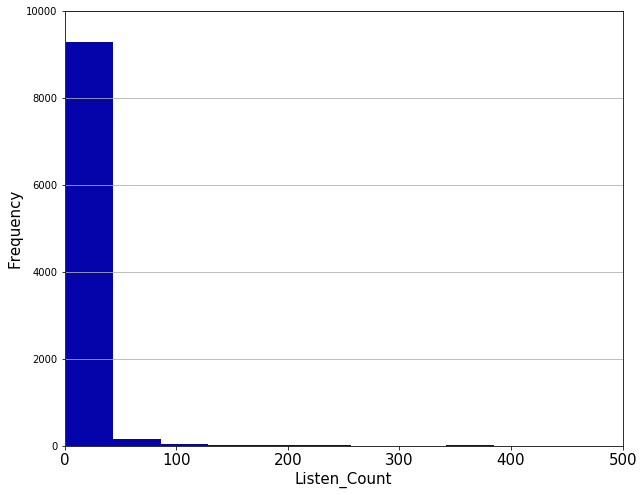

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=[10,8])

plt.hist(x=song_grouped['Listen_Count'],alpha=1,color='#0504aa',bins=10)
plt.xlim(0,500)
plt.ylim(0,10000)
plt.grid(axis='y')
plt.xlabel('Listen_Count',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.show()
plt.draw()

### we can Observe More than 9000 Song are having listen Count less than 100  and very few songs having Listen Count greater than 300

In [17]:
group_sum = song_grouped['Listen_Count'].sum()
song_grouped['Percentage']  = song_grouped['Listen_Count'].div(group_sum)*100
song_grouped['Rank'] = song_grouped['Percentage'].rank(ascending=False, method='first').map(int)

In [18]:
songs_grouped_sorted = song_grouped.sort_values(['Listen_Count'], ascending=False)
#songs_grouped_sorted=songs_grouped_sorted.reset_index()

In [19]:
songs_grouped_sorted.head(10)

,Title,Listen_Count,Percentage,Rank
6789,Sehr kosmisch,427,0.427,1
8672,Undo,367,0.367,2
1948,Dog Days Are Over (Radio Edit),363,0.363,3
9436,You're The One,343,0.343,4
6778,Secrets,308,0.308,5
6452,Revelry,306,0.306,6
3411,Horn Concerto No. 4 in E flat K495: II. Romanc...,266,0.266,7
2573,Fireflies,258,0.258,8
8442,Tive Sim,246,0.246,9
3297,Hey_ Soul Sister,235,0.235,10


In [20]:
#train= songs_grouped_sorted.to_csv("train.csv")

## Popularity Based Recommendation

In [21]:
from Recommenders import PopularSongs_Recomm
mod = PopularSongs_Recomm()
user1=users[5]
result = mod.Popularity_level(songs_grouped_sorted,user1)
print("These are the Popular Songs You Should Listen")
result

These are the Popular Songs You Should Listen


,User_Id,Title,Rank,Popularity
5,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch,1,High
2,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo,2,High
4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit),3,High
1,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One,4,High
3,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Secrets,5,High
0,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Horn Concerto No. 4 in E flat K495: II. Romanc...,7,High
6,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies,8,High
8,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Catch You Baby (Steve Pitron & Max Sanna Radio...,15,Medium
11,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Creep (Explicit),25,Medium
10,4bd88bfb25263a75bbdd467e74018f4ae570e5df,When You Were Young,43,Medium


In [22]:
user2=users[10]
result = mod.Popularity_level(songs_grouped_sorted,user2)
print("These are the Popular Songs You Should Listen")
result

These are the Popular Songs You Should Listen


,User_Id,Title,Rank,Popularity
5,17aa9f6dbdf753831da8f38c71b66b64373de613,Sehr kosmisch,1,High
1,17aa9f6dbdf753831da8f38c71b66b64373de613,Undo,2,High
4,17aa9f6dbdf753831da8f38c71b66b64373de613,Dog Days Are Over (Radio Edit),3,High
6,17aa9f6dbdf753831da8f38c71b66b64373de613,You're The One,4,High
3,17aa9f6dbdf753831da8f38c71b66b64373de613,Secrets,5,High
2,17aa9f6dbdf753831da8f38c71b66b64373de613,Revelry,6,High
0,17aa9f6dbdf753831da8f38c71b66b64373de613,Fireflies,8,High
10,17aa9f6dbdf753831da8f38c71b66b64373de613,OMG,14,Medium
9,17aa9f6dbdf753831da8f38c71b66b64373de613,ReprÃ©sente,24,Medium
8,17aa9f6dbdf753831da8f38c71b66b64373de613,Halo,38,Medium


In [23]:
train_data, test_data = train_test_split(song_df, test_size = 0.30, random_state=0)
train_data.head(5)
test_data.shape

(30000, 7)

## Personalized Song Recommendation

In [24]:
from Recommenders import Item_Similarity_Recomm
#recommending for user in usersList at index 6
user=users[8]
song=songs[3]
model= Item_Similarity_Recomm()
model.create(train_data,user,song)


print("Training data songs for the user userid: %s:" % user)
print("----------------------------------------------------------------------")
print("USer with ID: {0} Listen to these Songs :".format(user))
user_songs = model.get_User_Songs(user)
for i in user_songs:
    print(i)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

model.recommend(user)

Training data songs for the user userid: 9bb911319fbc04f01755814cb5edb21df3d1a336:
----------------------------------------------------------------------
USer with ID: 9bb911319fbc04f01755814cb5edb21df3d1a336 Listen to these Songs :
If I Can't Have You
Tell Me Why
Angel On My Shoulder (EDX Radio Edit)
Bulletproof
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 4
no. of unique songs in the training set: 9339
Non zero values in cooccurence_matrix :2490


,User_id,Title,Score,Rank
0,9bb911319fbc04f01755814cb5edb21df3d1a336,Pre-Game (Explicit) (Feat. Jay-Z),0.050000,1
1,9bb911319fbc04f01755814cb5edb21df3d1a336,Your Every Idol,0.044003,2
2,9bb911319fbc04f01755814cb5edb21df3d1a336,I'm Glad,0.041667,3
3,9bb911319fbc04f01755814cb5edb21df3d1a336,Bowls,0.041667,4
4,9bb911319fbc04f01755814cb5edb21df3d1a336,Hannibal,0.041667,5
5,9bb911319fbc04f01755814cb5edb21df3d1a336,The Summer,0.041667,6
6,9bb911319fbc04f01755814cb5edb21df3d1a336,All In My Blood [Pittsburgh Sound] [Radio Edit],0.041667,7
7,9bb911319fbc04f01755814cb5edb21df3d1a336,Believe In Me (A&T Remix),0.041667,8
8,9bb911319fbc04f01755814cb5edb21df3d1a336,Puppets,0.041667,9
9,9bb911319fbc04f01755814cb5edb21df3d1a336,Roger That,0.038462,10


## Compare above output with below output 

In [25]:
#recommending for user in usersList at index 15
user=users[15]
song=songs[2]
model= Item_Similarity_Recomm()
model.create(song_df,user,song)


print("Training data songs for the user userid: %s:" % user)
print("----------------------------------------------------------------------")
print("USer with ID: {0} Listen to these Songs :".format(user))
user_songs = model.get_User_Songs(user)
for i in user_songs:
    print(i)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

model.recommend(user)

Training data songs for the user userid: ed7d4c476013b1c3dd91982b61494bf7436083ba:
----------------------------------------------------------------------
USer with ID: ed7d4c476013b1c3dd91982b61494bf7436083ba Listen to these Songs :
Sehr kosmisch
Dans Ma Bulle (Edit Radio - Live 2006)
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 2
no. of unique songs in the training set: 9507
Non zero values in cooccurence_matrix :6349


,User_id,Title,Score,Rank
0,ed7d4c476013b1c3dd91982b61494bf7436083ba,Dog Days Are Over (Radio Edit),0.159829,1
1,ed7d4c476013b1c3dd91982b61494bf7436083ba,Secrets,0.153464,2
2,ed7d4c476013b1c3dd91982b61494bf7436083ba,Fireflies,0.146743,3
3,ed7d4c476013b1c3dd91982b61494bf7436083ba,Hey_ Soul Sister,0.125709,4
4,ed7d4c476013b1c3dd91982b61494bf7436083ba,Marry Me,0.120579,5
5,ed7d4c476013b1c3dd91982b61494bf7436083ba,OMG,0.112533,6
6,ed7d4c476013b1c3dd91982b61494bf7436083ba,Drop The World,0.099857,7
7,ed7d4c476013b1c3dd91982b61494bf7436083ba,Alejandro,0.098488,8
8,ed7d4c476013b1c3dd91982b61494bf7436083ba,Undo,0.091134,9
9,ed7d4c476013b1c3dd91982b61494bf7436083ba,Love Story,0.085915,10


##  Similar Song to Particular Song

In [26]:
song=['Again & Again','From The Station']
model.get_similar_items(song)

no. of unique songs in the training set: 9507
Non zero values in cooccurence_matrix :3972


,User_id,Title,Score,Rank
0,,Big Big Love (Fig .2),0.258537,1
1,,The Prize,0.224311,2
2,,My Love,0.223214,3
3,,Acadian Coast,0.218023,4
4,,Step Through The Door,0.218023,5
5,,Mia,0.211038,6
6,,Monday Morning Cold (band),0.209857,7
7,,Coda,0.203087,8
8,,We Will Become Silhouettes (Album),0.200000,9
9,,Fast As I Can,0.199346,10
